<a href="https://colab.research.google.com/github/aakritimahaldar/mytestrepo/blob/main/Restaurant_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Restaurant_Reviews.tsv",delimiter='\t',quoting=3)  # encoding="latin"

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [ ]:
df.shape

(1000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe(include="object").T

,count,unique,top,freq
Review,1000,996,I would not recommend this place.,2


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Liked,1000.0,0.5,0.50025,0.0,0.0,0.5,1.0,1.0


In [ ]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [ ]:
df['length']=df['Review'].apply(len)
df.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [ ]:
df[df['length']==100]['Review'].iloc[0]

"Perhaps I caught them on an off night judging by the other reviews, but I'm not inspired to go back."

In [ ]:
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
#cleaning the reviews

corpus=[]
for i in range(0,1000):

 #1000 records
 #cleaning special character from the reviews
 #the re.sub() method performs global search and global replace on the given data
  review = re.sub(pattern='[^a-zA-Z]', repl= ' ',string=str(df['Review'][i]))

  #covering the entire review into lowercase
  review=review.lower()

  #Tokenizing the review by words
  review_words= review.split()

  #removing the stopwords
  review_words= [word for word in review_words if not word in set(stopwords.words('english'))]

  #streaming the stopwords
  ps= PorterStemmer()
  review=[ps.stem(word) for word in review_words]

  #joining the stemmed words
  review=' '.join(review)

  #creating a corpus
  corpus.append(review)


In [ ]:
corpus[0:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
def text_process(msg):
  nopunc =[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words("english")])

In [ ]:
df.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [ ]:
df['tokenized_Review'] = df['Review'].apply(text_process)

In [ ]:
df.head()

,Review,Liked,length,tokenized_Review
0,Wow... Loved this place.,1,24,Wow Loved place
1,Crust is not good.,0,18,Crust good
2,Not tasty and the texture was just nasty.,0,41,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,87,Stopped late May bank holiday Rick Steve recom...
4,The selection on the menu was great and so wer...,1,59,selection menu great prices


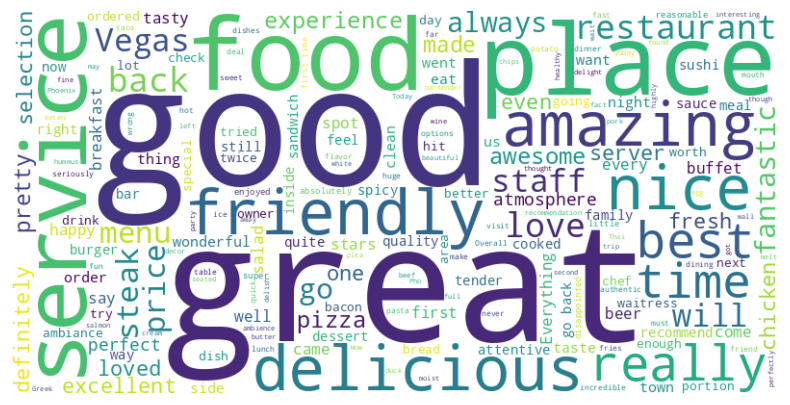

In [ ]:
#Import Library
#positive review

from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud=df.loc[df['Liked'] == 1,:]
text= ' '.join([text for text in word_cloud['Review']])
#Generate a WordCloud object
wordcloud=WordCloud(width=800, height=400, background_color='white').generate(text)
#Display  the word cloud using Matplotlib
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

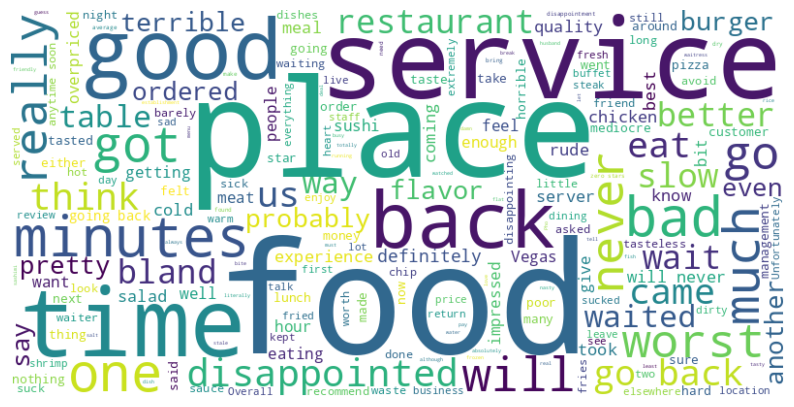

In [ ]:
#Negative review
# Import library

from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = df.loc[df['Liked'] == 0,:]
text= ' '.join([text for text in word_cloud['Review']])
#Generate a WordCloud object
wordcloud= WordCloud(width=800, height=400, background_color='white').generate(text)
#Display  the word cloud using Matplotlib
plt.figure(figsize=(10,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)  #max_features = 1500
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:,1].values

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = CountVectorizer(max_df = 0.9,min_df= 10)
X= vectorizer.fit_transform(df['tokenized_Review']).toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df['tokenized_Review'],df['Liked'],random_state = 107,test_size=0.2)

In [ ]:
X_train.head()

675                        fantastic neighborhood gem
561                               two felt disgusting
535    excellent new restaurant experienced Frenchman
266                                service par either
199                                       worth drive
Name: tokenized_Review, dtype: object

In [ ]:
train_vectorized = vectorizer.transform(X_train)
test_vectorized = vectorizer.transform(X_test)

In [ ]:
X_train_array = train_vectorized.toarray()
X_test_array= test_vectorized.toarray()

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb= GaussianNB()

nb.fit(X_train_array , y_train)

GaussianNB()

In [ ]:
y_train_preds_nb= nb.predict(X_train_array)
y_test_preds_nb= nb.predict(X_test_array)

In [ ]:
y_test_preds_nb

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1])

In [ ]:
y_test

906    0
24     1
706    1
958    0
355    1
      ..
657    1
754    0
839    1
495    0
804    1
Name: Liked, Length: 200, dtype: int64

In [ ]:
pd.DataFrame({"actual_y_value":y_test, "predicted_y_value":y_test_preds_nb})

,actual_y_value,predicted_y_value
906,0,0
24,1,0
706,1,1
958,0,0
355,1,1
...,...,...
657,1,1
754,0,0
839,1,0
495,0,0


In [ ]:
data=pd.DataFrame({"actual_y_value":y_test,"predicted_y_value":y_test_preds_nb})
df=pd.DataFrame(data)
print(df)
conf_matrix = confusion_matrix(df["actual_y_value"], df["predicted_y_value"])
print("Confusion Matrix:")
print(conf_matrix)

     actual_y_value  predicted_y_value
0                 0                  0
1                 0                  0
2                 0                  1
3                 0                  0
4                 0                  1
..              ...                ...
195               0                  1
196               1                  0
197               1                  0
198               0                  0
199               1                  1

[200 rows x 2 columns]
Confusion Matrix:
[[68 29]
 [57 46]]


In [ ]:
from sklearn.model_selection import train_test_split   #used to test the data into training data and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 99), (200, 99), (800,), (200,))

In [ ]:
#Fit Naive Bayes to the Training set

from sklearn.naive_bayes import MultinomialNB
# the multinomial Naive Bayes classifier is suitable for classification with discrete features(e.g., word counts for text classification).

classifier = MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_pred = classifier.predict(X_test)
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

def print_metrics(actual, predicted):
    print('accuracy_score is {}'.format(accuracy_score(actual, predicted)))
    print('precision_score is {}'.format(precision_score(actual, predicted)))
    print('recall_score is {}'.format(recall_score(actual, predicted)))
    print('f1_score is {}'.format(f1_score(actual, predicted)))
    print('roc_auc_score is {}'.format(roc_auc_score(actual, predicted)))
    print('confusion_matrix is {}'.format(confusion_matrix(actual, predicted)))
    print('classification_report is {}'.format(classification_report(actual, predicted)))

In [ ]:
#Evaluation of training model
print_metrics(y_train, y_train_preds_nb)

accuracy_score is 0.5175
precision_score is 0.5179153094462541
recall_score is 0.4005037783375315
f1_score is 0.45170454545454547
roc_auc_score is 0.5166290603846466
confusion_matrix is [[255 148]
 [238 159]]
classification_report is               precision    recall  f1-score   support

           0       0.52      0.63      0.57       403
           1       0.52      0.40      0.45       397

    accuracy                           0.52       800
   macro avg       0.52      0.52      0.51       800
weighted avg       0.52      0.52      0.51       800



In [ ]:
#Evaluation of the testing model
print_metrics(y_test, y_test_preds_nb)

accuracy_score is 0.57
precision_score is 0.6133333333333333
recall_score is 0.44660194174757284
f1_score is 0.5168539325842697
roc_auc_score is 0.5738164347913122
confusion_matrix is [[68 29]
 [57 46]]
classification_report is               precision    recall  f1-score   support

           0       0.54      0.70      0.61        97
           1       0.61      0.45      0.52       103

    accuracy                           0.57       200
   macro avg       0.58      0.57      0.56       200
weighted avg       0.58      0.57      0.56       200



In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[78, 19],
       [37, 66]])

In [ ]:
#Model Generation using Multinomial Naive Bayes
mnv=MultinomialNB()
mnv.fit(X_train_array , y_train )

MultinomialNB()

In [ ]:
classifier=MultinomialNB(alpha=0.2)
classifier.fit(X_train_array,y_train)

MultinomialNB(alpha=0.2)

In [ ]:
y_train_preds_mnv = mnv.predict(X_train_array)
y_test_preds_mnv = mnv.predict(X_test_array)

In [ ]:
y_test_preds_mnv

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0])

In [ ]:
#Evaluation of training model
print_metrics(y_train, y_train_preds_mnv)

accuracy_score is 0.63625
precision_score is 0.653179190751445
recall_score is 0.5692695214105793
f1_score is 0.6083445491251681
roc_auc_score is 0.6357513860154634
confusion_matrix is [[283 120]
 [171 226]]
classification_report is               precision    recall  f1-score   support

           0       0.62      0.70      0.66       403
           1       0.65      0.57      0.61       397

    accuracy                           0.64       800
   macro avg       0.64      0.64      0.63       800
weighted avg       0.64      0.64      0.63       800



In [ ]:
#Evaluation of testing model
print_metrics(y_test, y_test_preds_mnv)

accuracy_score is 0.525
precision_score is 0.5425531914893617
recall_score is 0.49514563106796117
f1_score is 0.5177664974619288
roc_auc_score is 0.5259233309978981
confusion_matrix is [[54 43]
 [52 51]]
classification_report is               precision    recall  f1-score   support

           0       0.51      0.56      0.53        97
           1       0.54      0.50      0.52       103

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.53      0.53      0.52       200



In [ ]:
#Hyper parameter tuning
best_accuracy=0.0
alpha_val=0

for i in np.arange(0.01,1.1,0.1):
 temp_cls= MultinomialNB(alpha=i)
 temp_cls.fit(X_train_array, y_train)
 y_test_pred_h_nbayes = temp_cls.predict(X_test_array)
 score=accuracy_score(y_test, y_test_pred_h_nbayes)
 print("accuracy score for alpha-{} is {}%".format(round(i,1),round(score*100,2)))
 if score>best_accuracy:
  best_accuracy=score
  alpha_val=i
print("...............................")
print("the best accuracy is {}% with alpha value as {}".format(round(best_accuracy*100,2),round(alpha_val,1)))


accuracy score for alpha-0.0 is 53.5%
accuracy score for alpha-0.1 is 53.5%
accuracy score for alpha-0.2 is 53.5%
accuracy score for alpha-0.3 is 53.5%
accuracy score for alpha-0.4 is 53.5%
accuracy score for alpha-0.5 is 53.0%
accuracy score for alpha-0.6 is 53.0%
accuracy score for alpha-0.7 is 53.0%
accuracy score for alpha-0.8 is 53.0%
accuracy score for alpha-0.9 is 52.5%
accuracy score for alpha-1.0 is 52.5%
...............................
the best accuracy is 53.5% with alpha value as 0.0


Text(95.72222222222221, 0.5, 'Actual Values')

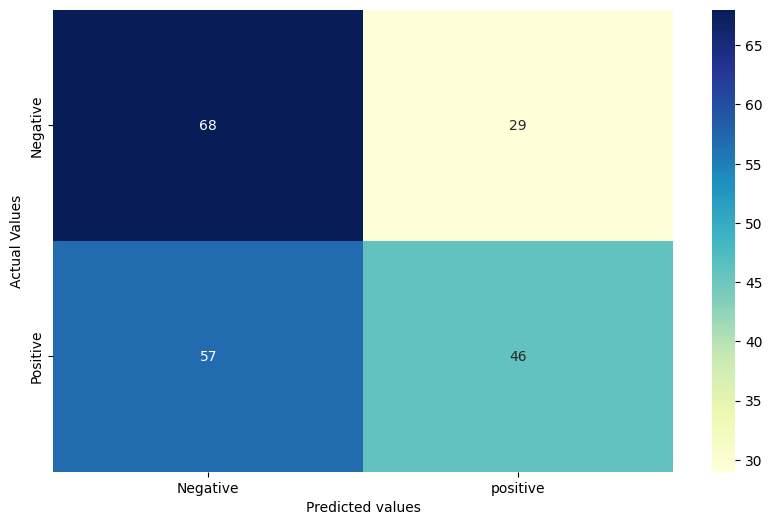

In [ ]:
#plotting the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm=confusion_matrix(y_test,y_test_preds_nb)
%matplotlib inline

plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap="YlGnBu",xticklabels=["Negative","positive"],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')

In [ ]:
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern = '[^a-zA-Z]',repl=' ',string = sample_review)
    sample_review =sample_review.lower()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps=PorterStemmer()
    final_review =[ps.stem(word) for word in sample_review_words]
    final_review = ' ' .join(final_review)

    temp=cv.transform([final_review]).toarray()
    return classifier.predict(temp)


In [ ]:
import re
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer

def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()

    # Tokenize the review into words
    sample_review_words = sample_review.split()

    sample_review_words = [word for word in sample_review_words if word not in set(stopwords.words('english'))]

    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]

    # Join the words back into a string
    final_review = ' '.join(final_review)


    classifier=MultinomialNB(alpha=0.2)
    classifier.fit(X_train_array,y_train)
#Predicted values
sample_review = 'The food is pretty bad and the service was very slow'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is Negative review!')


This is Negative review!


In [ ]:
import re
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer

def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()

    # Tokenize the review into words
    sample_review_words = sample_review.split()

    sample_review_words = [word for word in sample_review_words if word in set(stopwords.words('english'))]

    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]

    # Join the words back into a string
    final_review = ' '.join(final_review)


    classifier=MultinomialNB(alpha=0.2)
    classifier.fit(X_train_array,y_train)
    #Predicted values
sample_review = 'The food is very very good'

if predict_sentiment(sample_review):
  print('This is a Negative review')
else:
  print('This is Positive review!')

This is Positive review!
